In [1]:
## plotting CTD values from Seabird-processed .cnv files 

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import os 
import fnmatch 
import cmocean

In [4]:

def parse_cnv_file(filename):
    """Parse a Sea-Bird .cnv file into metadata and data."""
    metadata = {}
    data = []

    with open(filename, 'r') as file:
        for line in file:
            # Check for metadata (lines starting with '*')
            if line.startswith('*'):
                if '=' in line:
                    # Metadata key-value pair
                    key, value = line[1:].strip().split('=', 1)
                    metadata[key.strip()] = value.strip()
                else:
                    # Metadata comments without key-value
                    key = line[1:].strip()
                    metadata[key] = None
            elif line.startswith('#'):
                # Column headers start with '#'
                if 'name' in line:
                    _, col_index, col_name = line.strip().split(' ', 2)
                    metadata[f"Column_{col_index.strip()}"] = col_name.strip()
            else:
                # Data starts after metadata and column definitions
                data.append(line.strip())

    # Convert data into a DataFrame
    if data:
        data = [list(map(float, row.split())) for row in data if row]
        df = pd.DataFrame(data, columns=[metadata.get(f"Column_{i}", f"Column_{i}") for i in range(len(data[0]))])
    else:
        df = pd.DataFrame()

    return metadata, df

In [5]:
base = '/home/vboatwright/mnt/scienceparty_share/SR2503_scienceparty_share/CTD/'
base = '/media/vboatwright/KBZ/SR2503_scienceparty_share/CTD/SurveyStations/'
cruise = 'SR2503' 
castnumber = 7
filename = f'{cruise}_cast_{castnumber:02d}_updown.cnv' # 2-digits for cast number
metadata, data = parse_cnv_file(base+filename)

print("Metadata:")
for key, value in metadata.items():
    print(f"{key}: {value}")

# Example: Show the first 5 rows of data
print("\nData:")
print(data.head())

# based on processing of Seabird data with no edits --> first .CNV file after Data Conversion in Seabird 
# final files as of 3/17/2025; up/down only 

temp1 = data['Column_0'].values
cond1 = data['Column_1'].values
p = data['Column_2'].values
temp2 = data['Column_3'].values
cond2 = data['Column_4'].values
trans = data['Column_5'].values
fluoro = data['Column_6'].values
altimeter = data['Column_7'].values
PAR = data['Column_8'].values
oxygen = data['Column_9'].values
upv = data['Column_10'].values
SPAR = data['Column_11'].values
sal1 = data['Column_12'].values
sal2 = data['Column_13'].values
lon = data['Column_14'].values
lat = data['Column_15'].values
flag = data['Column_16'].values






Metadata:
Sea-Bird SBE 9 Data File:: None
FileName: C:\CTD\2025\SR2503\SR2503_cast_07.hex
Software Version Seasave V 7.26.7.121: None
Temperature SN: 5046
Conductivity SN: 3057
Number of Bytes Per Scan: 40
Number of Voltage Words: 5
Number of Scans Averaged by the Deck Unit: 1
System UpLoad Time: Feb 24 2025 14:57:16
NMEA Latitude: 34 38.50 N
NMEA Longitude: 122 07.74 W
NMEA UTC (Time): Feb 24 2025  14:57:16
Store Lat/Lon Data: Append to Every Scan
SBE 11plus V 5.2: None
number of scans to average: 1
pressure baud rate: 9600
NMEA baud rate: 4800
surface PAR voltage added to scan: None
A/D offset: 0
GPIB address: 1
advance primary conductivity  0.073 seconds: None
advance secondary conductivity  0.073 seconds: None
autorun on power up is disabled: None
S>: None
* Ship: Sally Ride: None
* Cruise: St Lucia: None
* Station: Station 02: None
* Cast: 07: None
* Operator: Victoria Boatwright: None
* Cast Type: Full depth: None
System UTC: Feb 24 2025 14:57:16
Column_name: 16 = flag:  0.000e+0

In [5]:
# length of data? 
print(f'max depth: {np.nanmax(p)}')
print(f'file length: {len(p)}')


max depth: 3934.056
file length: 212103


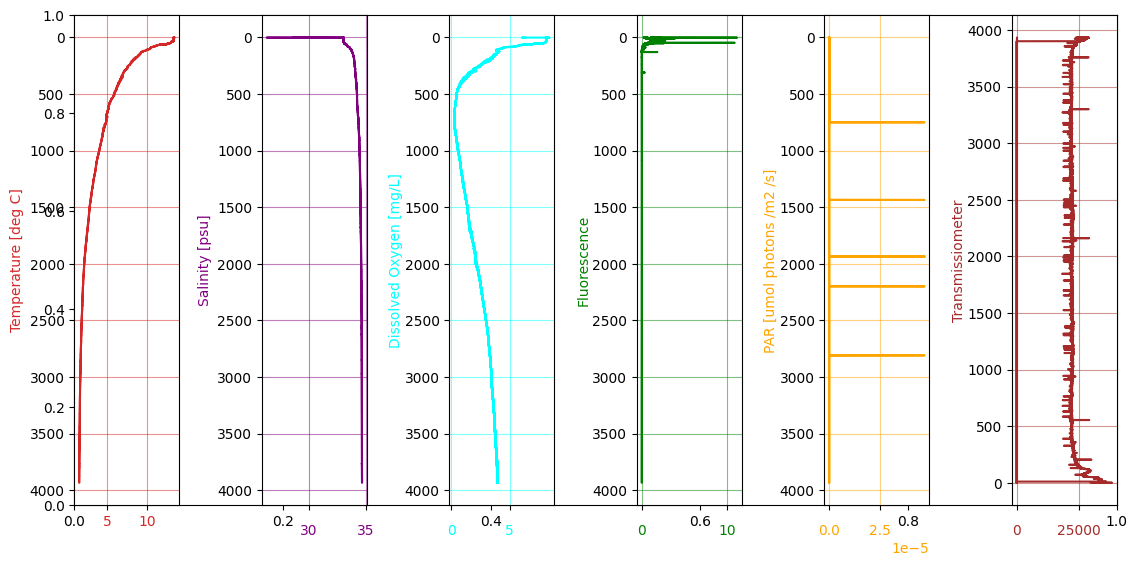

In [6]:

# a little plotting 


# plot to show
fig,ax0 = plt.subplots(figsize=(12,6))

ax0 = plt.subplot(1,6,1)
color = 'tab:red'
ax0.plot(temp1,p,color=color)
ax0.invert_yaxis()
ax0.set_ylabel('Depth [dbar]'); 
ax0.set_ylabel('Temperature [deg C]',color=color)
ax0.tick_params(axis='x', labelcolor=color)
ax0.grid(color=color,alpha=0.5)

#ax1 = ax0.twiny()
ax1 = plt.subplot(1,6,2)
color = 'purple'
ax1.plot(sal1,p,color=color)
ax1.invert_yaxis()
ax1.set_ylabel('Salinity [psu]',color=color,labelpad=4)
ax1.tick_params(axis='x', labelcolor=color, pad=10)
ax1.grid(color=color,alpha=0.5)

#ax2 = ax0.twiny()
ax2 = plt.subplot(1,6,3)
color = 'cyan'
ax2.plot(oxygen,p,label='O2',color=color)
ax2.invert_yaxis()
ax2.set_ylabel('Dissolved Oxygen [mg/L]',color=color,labelpad=1)
ax2.tick_params(axis='x', labelcolor=color, pad=10)
ax2.grid(color=color,alpha=0.5)

#ax3 = ax2.twiny()
ax3 = plt.subplot(1,6,4)
color = 'green'
ax3.plot(fluoro,p,label='Fluoro',color=color)
ax3.invert_yaxis()
ax3.set_ylabel('Fluorescence',color=color,labelpad=1)
ax3.tick_params(axis='x', labelcolor=color, pad=10)
ax3.grid(color=color,alpha=0.5)


#ax4 = ax2.twiny()
ax4 = plt.subplot(1,6,5)
color = 'orange'
ax4.plot(PAR,p,color=color)
ax4.invert_yaxis()
ax4.set_ylabel('PAR [umol photons /m2 /s]',color=color,labelpad=1)
ax4.tick_params(axis='x', labelcolor=color, pad=10)
ax4.grid(color=color,alpha=0.5)


#ax5 = ax2.twiny()
ax5 = plt.subplot(1,6,6)
color = 'brown'
ax5.plot(upv,p,label='UPV',color=color)
ax5.invert_yaxis()
ax5.set_ylabel('UPV Scattering',color=color,labelpad=1)
ax5.tick_params(axis='x', labelcolor=color, pad=10)
ax5.grid(color=color,alpha=0.5)


#ax5 = ax2.twiny()
ax5 = plt.subplot(1,6,6)
color = 'brown'
ax5.plot(trans,p,label='trans',color=color)
ax5.invert_yaxis()
ax5.set_ylabel('Transmissiometer',color=color,labelpad=1)
ax5.tick_params(axis='x', labelcolor=color, pad=10)
ax5.grid(color=color,alpha=0.5)

plt.tight_layout()
plt.show()


In [7]:
path = '/media/vboatwright/KBZ/SR2503_scienceparty_share/CTD/'
deploy = 'SurveyStations/'
files = set(os.listdir(path+deploy))
cnv_files = [f for f in files if fnmatch.fnmatch(f, '*.cnv')]
cnv_files



['SR2503_cast_10_updown.cnv',
 'SR2503_cast_13_updown.cnv',
 'SR2503_cast_01_updown.cnv',
 'SR2503_cast_02a_updown.cnv',
 'SR2503_cast_09_updown.cnv',
 'SR2503_cast_12_updown.cnv',
 'SR2503_cast_11_updown.cnv',
 'SR2503_cast_07_updown.cnv',
 'SR2503_cast_dante_updown.cnv',
 'SR2503_cast_02_updown.cnv',
 'SR2503_cast_06_updown.cnv',
 'SR2503_cast_04_updown.cnv',
 'SR2503_cast_05_updown.cnv',
 'SR2503_cast_03_updown.cnv',
 'SR2503_cast_08_updown.cnv']

In [7]:
# next, process in a loop to plot all 

path = '/media/vboatwright/KBZ/SR2503_scienceparty_share/CTD/'
deploy = 'SurveyStations/'

# make a variable for survey stations: 
num_stations = 13

num_variables = 17
variable_order = ['Temp','Cond','Pressure','Temp2','Cond2','Transmissometer','Fluorometer','Alimeter','PAR','Oxygen','UPV','SPAR','Salinity','Salinity2','Lon','Lat','Flag']
# longest (?) shape of p/t/c object: 212103
deepest = 222873
stations = [1,5,9,11,7,2,6,10,12,8,4,3];
cardinallocs = np.array([0,9,5,1,3,7,10,6,2,4,8,12,11]) 
cardinal = cardinallocs[1:]
survey_data = np.zeros((num_stations,num_variables,deepest))*np.nan

# loop through survey data 

castnumber = np.arange(1,14) # stations 0-13 (includes wildfire station) 
stations = [0,1,5,9,11,7,2,6,10,12,8,4,3];


for ii,cc in enumerate(castnumber):
    filename = f'{cruise}_cast_{cc:02d}_updown.cnv' # 2-digits for cast number
    if cc == 2: 
        filename = f'{cruise}_cast_{cc:02d}a_updown.cnv' # 2-digits for cast number
        
    metadata, data = parse_cnv_file(path+deploy+filename)

    # save data with index as each station #
    ss = stations[ii]

    zlen = len(data['Column_2'].values)
    
    temp1 = data['Column_0'].values
    survey_data[ss,0,0:zlen] = temp1
    
    cond1 = data['Column_1'].values
    survey_data[ss,1,0:zlen] = cond1

    p = data['Column_2'].values
    survey_data[ss,2,0:zlen] = p

    temp2 = data['Column_3'].values
    survey_data[ss,3,0:zlen] = temp2

    cond2 = data['Column_4'].values
    survey_data[ss,4,0:zlen] = cond2
    
    trans = data['Column_5'].values
    survey_data[ss,5,0:zlen] = trans
    
    fluoro = data['Column_6'].values
    survey_data[ss,6,0:zlen] = fluoro
    
    altimeter = data['Column_7'].values
    survey_data[ss,7,0:zlen] = altimeter

    PAR = data['Column_8'].values
    survey_data[ss,8,0:zlen] = PAR
    
    oxygen = data['Column_9'].values
    survey_data[ss,9,0:zlen] = oxygen
    
    upv = data['Column_10'].values
    survey_data[ii,10,0:zlen] = upv
    
    SPAR = data['Column_11'].values
    survey_data[ss,11,0:zlen] = SPAR
    
    sal1 = data['Column_12'].values
    survey_data[ss,12,0:zlen] = sal1
    
    sal2 = data['Column_13'].values
    survey_data[ss,13,0:zlen] = sal2
    
    lon = data['Column_14'].values
    survey_data[ss,14,0:zlen] = lon
    
    lat = data['Column_15'].values
    survey_data[ss,15,0:zlen] = lat

    flag = data['Column_16'].values
    survey_data[ss,16,0:zlen] = flag
    
    


In [12]:
np.linspace(0,1,13)

array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
       0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
       0.83333333, 0.91666667, 1.        ])

In [8]:
stations

[0, 1, 5, 9, 11, 7, 2, 6, 10, 12, 8, 4, 3]

In [9]:
# station_depths = [0 = 50, 1= 3850, 2 = 3890, 3= 3878, 4= 1248, 5= 4074, 6=4004 , 7=1653 , 8= 520, 9= 3703, 10 = 3815, 11=1615, 12=586]

station_depths = [50, 3850, 4074, 3703, 1615, 1653, 3890, 4004, 3815, 586, 520, 1248, 3878]
len(station_depths)

13

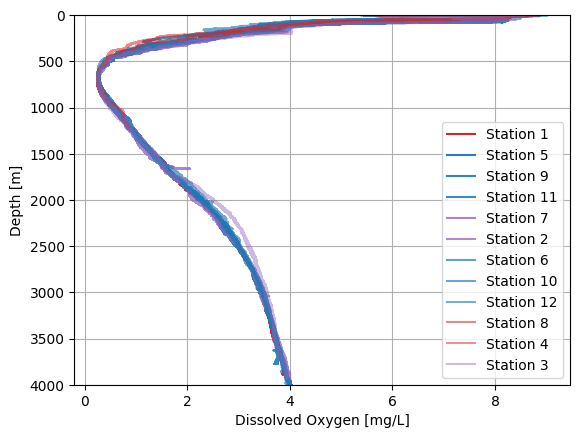

In [17]:
import matplotlib as mpl

# oxygen at every station 
a = 1 

var_cmap = mpl.cm.Blues
var_colors = var_cmap(np.linspace(0,1,13))

fig,ax = plt.subplots()
for ii,istat in enumerate(stations[1:]): 
    p_atstat = survey_data[istat,2,:]
    o_atstat = survey_data[istat,9,:]
    if station_depths[ii] > 3000: 
        this_color = 'tab:blue'
    elif station_depths[ii] > 1000: 
        this_color = 'tab:purple'
    if station_depths[ii] < 1000: 
        this_color = 'tab:red'
    ax.plot(o_atstat,p_atstat,label=f'Station {istat}',alpha=a,color=this_color)
    a = a - 0.05
    ax.set_ylim([4000,0])
    ax.set_ylabel('Depth [m]'); ax.set_xlabel('Dissolved Oxygen [mg/L]')
    ax.legend()
    ax.grid()
ax.grid()
plt.show()


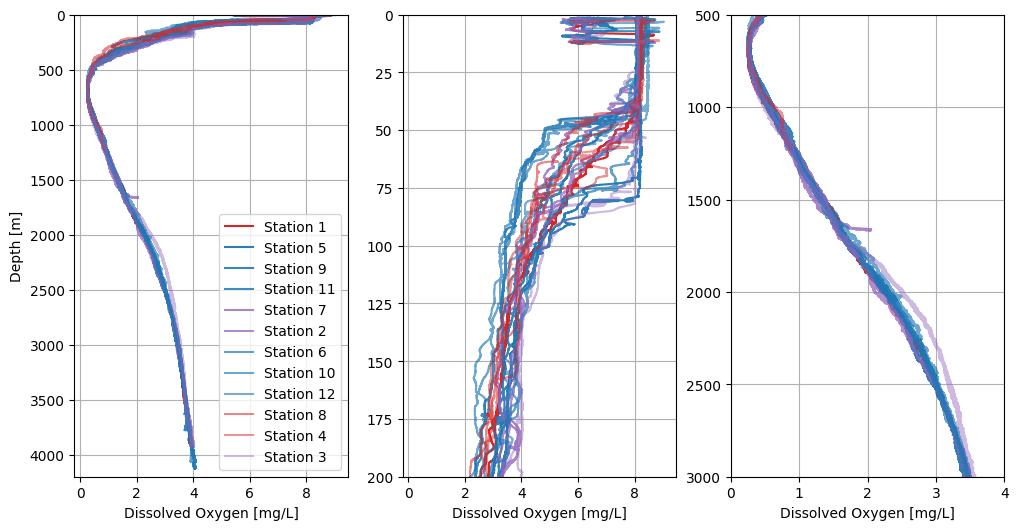

In [60]:
import matplotlib as mpl

# oxygen at every station 
a = 1 

var_cmap = mpl.cm.Blues
var_colors = var_cmap(np.linspace(0,1,13))

fig,axes = plt.subplots(1,3,figsize = (12,6))

# full water column plot 
ax = axes[0] 
ymin = 4200 
ymax = 0 

for ii,istat in enumerate(stations[1:]): 
    p_atstat = survey_data[istat,2,:]
    o_atstat = survey_data[istat,9,:]
    if station_depths[ii] > 3000: 
        this_color = 'tab:blue'
    elif station_depths[ii] > 1000: 
        this_color = 'tab:purple'
    if station_depths[ii] < 1000: 
        this_color = 'tab:red'
    ax.plot(o_atstat,p_atstat,label=f'Station {istat}',alpha=a,color=this_color)
    a = a - 0.05
    ax.set_ylim([ymin,ymax])
    ax.set_ylabel('Depth [m]'); ax.set_xlabel('Dissolved Oxygen [mg/L]')
    ax.legend()
    ax.grid()
ax.grid()

# surface 
ax = axes[1] 
ymin = 200 
ymax = 0 
a = 1 

for ii,istat in enumerate(stations[1:]): 
    p_atstat = survey_data[istat,2,:]
    o_atstat = survey_data[istat,9,:]
    if station_depths[ii] > 3000: 
        this_color = 'tab:blue'
    elif station_depths[ii] > 1000: 
        this_color = 'tab:purple'
    if station_depths[ii] < 1000: 
        this_color = 'tab:red'
    ax.plot(o_atstat,p_atstat,label=f'Station {istat}',alpha=a,color=this_color)
    a = a - 0.05
    ax.set_ylim([ymin,ymax])
    ax.set_xlabel('Dissolved Oxygen [mg/L]')
    ax.grid()
ax.grid()



# surface 
ax = axes[2] 
ymin = 3000
ymax = 500
a = 1 

for ii,istat in enumerate(stations[1:]): 
    p_atstat = survey_data[istat,2,:]
    o_atstat = survey_data[istat,9,:]
    if station_depths[ii] > 3000: 
        this_color = 'tab:blue'
    elif station_depths[ii] > 1000: 
        this_color = 'tab:purple'
    if station_depths[ii] < 1000: 
        this_color = 'tab:red'
    ax.plot(o_atstat,p_atstat,label=f'Station {istat}',alpha=a,color=this_color)
    a = a - 0.05
    ax.set_ylim([ymin,ymax])
    ax.set_xlim([0,4])
    ax.set_xlabel('Dissolved Oxygen [mg/L]')
    ax.grid()
ax.grid()


plt.show()

In [61]:
fig.savefig('/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/figures/cruise_report_figures/survey_stations_DO_bydepth_multiplezsegs.png',dpi=300)

temp1 = data['Column_0'].values
cond1 = data['Column_1'].values
p = data['Column_2'].values
temp2 = data['Column_3'].values
cond2 = data['Column_4'].values
trans = data['Column_5'].values
fluoro = data['Column_6'].values
altimeter = data['Column_7'].values
PAR = data['Column_8'].values
oxygen = data['Column_9'].values
upv = data['Column_10'].values
SPAR = data['Column_11'].values
sal1 = data['Column_12'].values
sal2 = data['Column_13'].values
lon = data['Column_14'].values
lat = data['Column_15'].values
flag = data['Column_16'].values

In [18]:
fig.savefig('/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/figures/cruise_report_figures/survey_station_DO_bydepth.png',dpi=300)

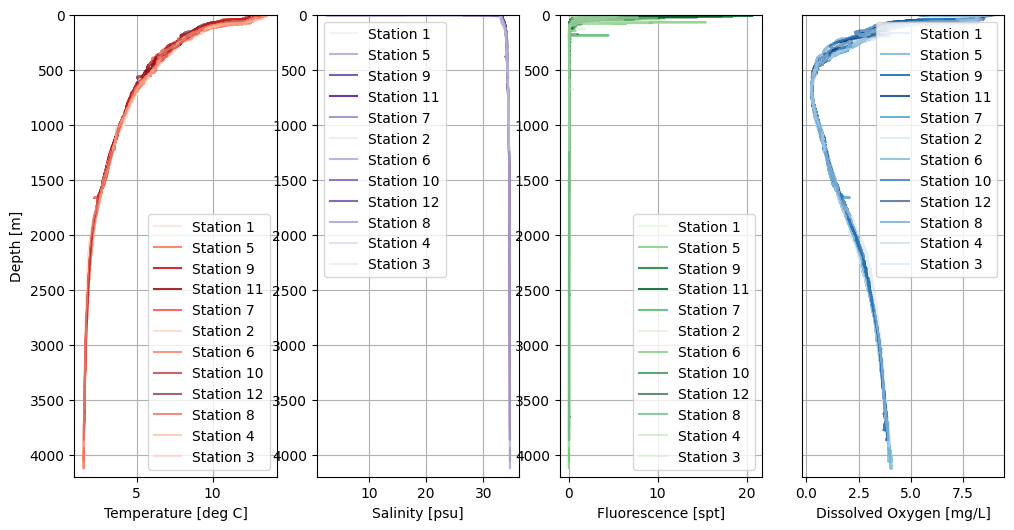

In [24]:
# temp, sal, oxy, chl at every station 

fig,axes = plt.subplots(1,4,figsize=(12,6))

ymin = 4200 

# temp 
ax = axes[0] 

var_cmap = mpl.cm.Reds
var_colors = var_cmap(np.linspace(0,1,13))
a = 1 
for ii,istat in enumerate(stations[1:]): 
    p_atstat = survey_data[istat,2,:]
    t_atstat = survey_data[istat,0,:]
    ax.plot(t_atstat,p_atstat,label=f'Station {istat}',alpha=a,color=var_colors[istat])
    a = a - 0.05
    ax.set_ylim([ymin,0])
    ax.set_ylabel('Depth [m]'); ax.set_xlabel('Temperature [deg C]')
    ax.legend()
    ax.grid(True)

# salinity 
ax = axes[1] 

var_cmap = mpl.cm.Purples
var_colors = var_cmap(np.linspace(0,1,13))
a = 1 
for ii,istat in enumerate(stations[1:]): 
    p_atstat = survey_data[istat,2,:]
    s_atstat = survey_data[istat,12,:]
    ax.plot(s_atstat,p_atstat,label=f'Station {istat}',alpha=a,color=var_colors[istat])
    a = a - 0.05
    ax.set_ylim([ymin,0]); ax.set_xlabel('Salinity [psu]')
    ax.legend()
    ax.grid(True); plt.tick_params(axis='y',which='both',left=False,right=False, labelleft=False)

# chl / fluoro 
ax = axes[2] 

var_cmap = mpl.cm.Greens
var_colors = var_cmap(np.linspace(0,1,13))
a = 1 
for ii,istat in enumerate(stations[1:]): 
    p_atstat = survey_data[istat,2,:]
    c_atstat = survey_data[istat,6,:]
    ax.plot(c_atstat,p_atstat,label=f'Station {istat}',alpha=a,color=var_colors[istat])
    a = a - 0.05
    ax.set_ylim([ymin,0]); ax.set_xlabel('Fluorescence [spt]')
    ax.legend()
    ax.grid(True); plt.tick_params(axis='y',which='both',left=False,right=False, labelleft=False)


ax = axes[3] 

var_cmap = mpl.cm.Blues
var_colors = var_cmap(np.linspace(0,1,13))
a = 1 
for ii,istat in enumerate(stations[1:]): 
    p_atstat = survey_data[istat,2,:]
    o_atstat = survey_data[istat,9,:]
    ax.plot(o_atstat,p_atstat,label=f'Station {istat}',alpha=a,color=var_colors[istat])
    a = a - 0.05
    ax.set_ylim([ymin,0]); ax.set_xlabel('Dissolved Oxygen [mg/L]')
    ax.legend()
    ax.grid(True); plt.tick_params(axis='y',which='both',left=False,right=False, labelleft=False) 

plt.show()


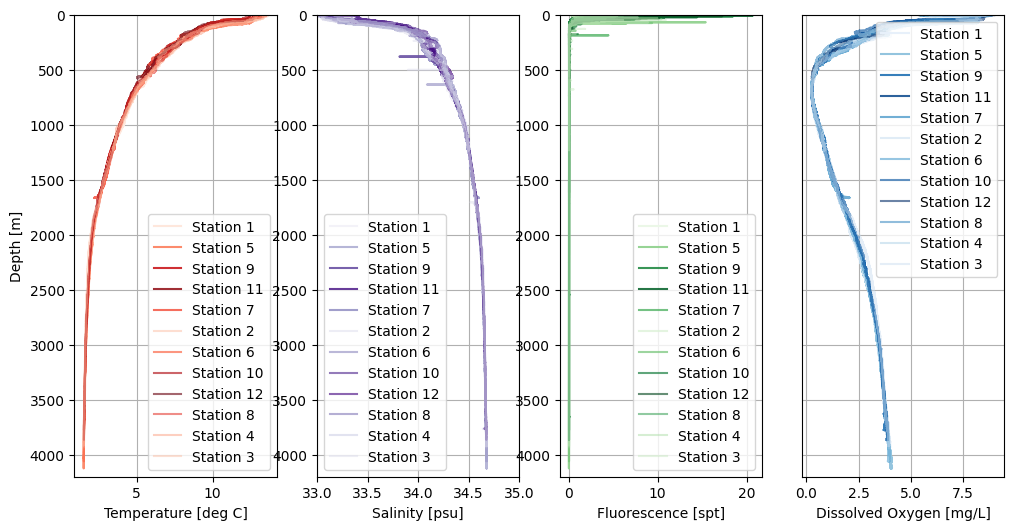

In [44]:
# temp, sal, oxy, chl at every station 

fig,axes = plt.subplots(1,4,figsize=(12,6))

ymin = 4200 

# temp 
ax = axes[0] 

var_cmap = mpl.cm.Reds
var_colors = var_cmap(np.linspace(0,1,13))
a = 1 
for ii,istat in enumerate(stations[1:]): 
    p_atstat = survey_data[istat,2,:]
    t_atstat = survey_data[istat,0,:]
    ax.plot(t_atstat,p_atstat,label=f'Station {istat}',alpha=a,color=var_colors[istat])
    a = a - 0.05
    ax.set_ylim([ymin,0])
    ax.set_ylabel('Depth [m]'); ax.set_xlabel('Temperature [deg C]')
    ax.legend()
    ax.grid(True)

# salinity 
ax = axes[1] 

var_cmap = mpl.cm.Purples
var_colors = var_cmap(np.linspace(0,1,13))
a = 1 
for ii,istat in enumerate(stations[1:]): 
    p_atstat = survey_data[istat,2,:]
    s_atstat = survey_data[istat,12,:]
    ax.plot(s_atstat,p_atstat,label=f'Station {istat}',alpha=a,color=var_colors[istat])
    a = a - 0.05
    ax.set_xlim([33,35])
    ax.set_ylim([ymin,0]); ax.set_xlabel('Salinity [psu]')
    ax.legend()
    ax.grid(True); plt.tick_params(axis='y',which='both',left=False,right=False, labelleft=False)

# chl / fluoro 
ax = axes[2] 

var_cmap = mpl.cm.Greens
var_colors = var_cmap(np.linspace(0,1,13))
a = 1 
for ii,istat in enumerate(stations[1:]): 
    p_atstat = survey_data[istat,2,:]
    c_atstat = survey_data[istat,6,:]
    ax.plot(c_atstat,p_atstat,label=f'Station {istat}',alpha=a,color=var_colors[istat])
    a = a - 0.05
    ax.set_ylim([ymin,0]); ax.set_xlabel('Fluorescence [spt]')
    ax.legend()
    ax.grid(True); plt.tick_params(axis='y',which='both',left=False,right=False, labelleft=False)


ax = axes[3] 

var_cmap = mpl.cm.Blues
var_colors = var_cmap(np.linspace(0,1,13))
a = 1 
for ii,istat in enumerate(stations[1:]): 
    p_atstat = survey_data[istat,2,:]
    o_atstat = survey_data[istat,9,:]
    ax.plot(o_atstat,p_atstat,label=f'Station {istat}',alpha=a,color=var_colors[istat])
    a = a - 0.05
    ax.set_ylim([ymin,0]); ax.set_xlabel('Dissolved Oxygen [mg/L]')
    ax.legend()
    ax.grid(True); plt.tick_params(axis='y',which='both',left=False,right=False, labelleft=False) 

plt.show()

save_loc = '/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/figures/cruise_report_figures/'
fig.savefig(save_loc+'allstations_fulldepth_temp-sal-fluor-do.png',dpi=300)

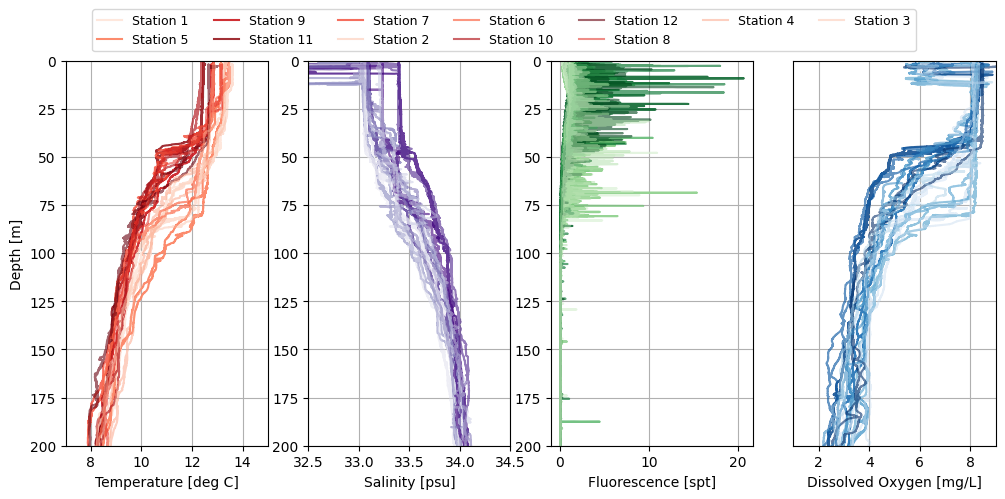

In [43]:
# temp, sal, oxy, chl at every station 

fig,axes = plt.subplots(1,4,figsize=(12,5))

ymin = 200

# temp 
ax = axes[0] 

var_cmap = mpl.cm.Reds
var_colors = var_cmap(np.linspace(0,1,13))
a = 1 
for ii,istat in enumerate(stations[1:]): 
    p_atstat = survey_data[istat,2,:]
    t_atstat = survey_data[istat,0,:]
    ax.plot(t_atstat,p_atstat,label=f'Station {istat}',alpha=a,color=var_colors[istat])
    a = a - 0.05
    ax.set_xlim([7,15])
    ax.set_ylim([ymin,0])
    ax.set_ylabel('Depth [m]'); ax.set_xlabel('Temperature [deg C]')
    ax.grid(True)
# ax.legend(loc='upper left', bbox_to_anchor=(0.1, 1.1), ncol=len(ax.get_legend_handles_labels()[1]),fontsize=9)
ax.legend(loc='upper left', bbox_to_anchor=(0.1, 1.15), ncol=7,fontsize=9)

# salinity 
ax = axes[1] 

var_cmap = mpl.cm.Purples
var_colors = var_cmap(np.linspace(0,1,13))
a = 1 
for ii,istat in enumerate(stations[1:]): 
    p_atstat = survey_data[istat,2,:]
    s_atstat = survey_data[istat,12,:]
    ax.plot(s_atstat,p_atstat,label=f'Station {istat}',alpha=a,color=var_colors[istat])
    a = a - 0.05
    ax.set_xlim([32.5,34.5])
    ax.set_ylim([ymin,0]); ax.set_xlabel('Salinity [psu]')
    ax.grid(True); plt.tick_params(axis='y',which='both',left=False,right=False, labelleft=False)

# chl / fluoro 
ax = axes[2] 

var_cmap = mpl.cm.Greens
var_colors = var_cmap(np.linspace(0,1,13))
a = 1 
for ii,istat in enumerate(stations[1:]): 
    p_atstat = survey_data[istat,2,:]
    c_atstat = survey_data[istat,6,:]
    ax.plot(c_atstat,p_atstat,label=f'Station {istat}',alpha=a,color=var_colors[istat])
    a = a - 0.05
    ax.set_ylim([ymin,0]); ax.set_xlabel('Fluorescence [spt]')
    ax.grid(True); plt.tick_params(axis='y',which='both',left=False,right=False, labelleft=False)


ax = axes[3] 

var_cmap = mpl.cm.Blues
var_colors = var_cmap(np.linspace(0,1,13))
a = 1 
for ii,istat in enumerate(stations[1:]): 
    p_atstat = survey_data[istat,2,:]
    o_atstat = survey_data[istat,9,:]
    ax.plot(o_atstat,p_atstat,label=f'Station {istat}',alpha=a,color=var_colors[istat])
    a = a - 0.05
    ax.set_xlim([1,9])
    ax.set_ylim([ymin,0]); ax.set_xlabel('Dissolved Oxygen [mg/L]')
    ax.grid(True); plt.tick_params(axis='y',which='both',left=False,right=False, labelleft=False) 

plt.show()

save_loc = '/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/figures/cruise_report_figures/'
fig.savefig(save_loc+'allstations_upper200m_temp-sal-fluor-do.png',dpi=300)

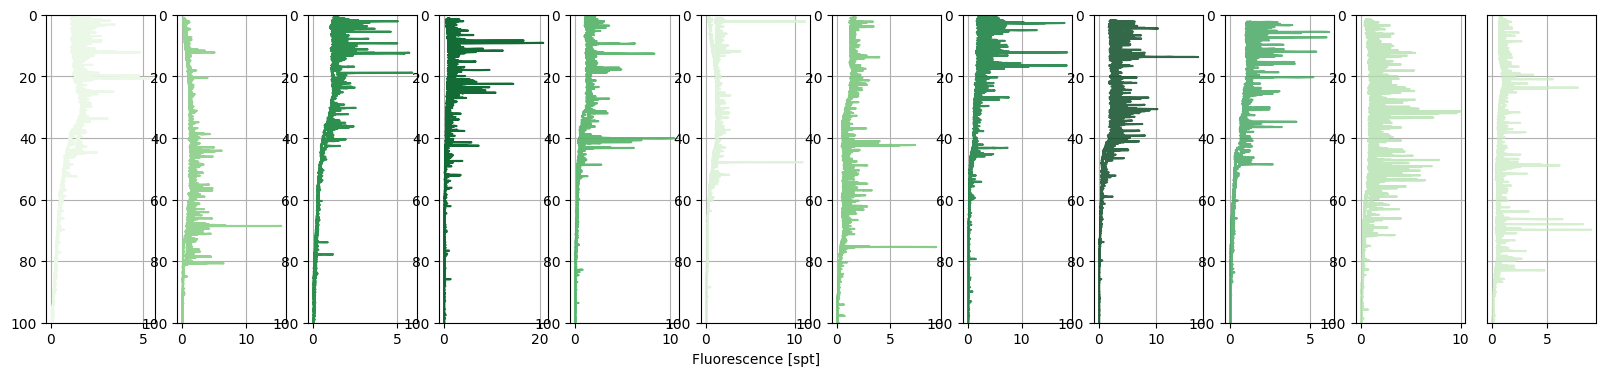

In [52]:
# chl / fluoro 
fig,axes = plt.subplots(1,12,figsize=(20,4))

ymin = 100
var_cmap = mpl.cm.Greens
var_colors = var_cmap(np.linspace(0,1,13))
a = 1 
for ii,istat in enumerate(stations[1:]): 
    ax = axes[ii]
    p_atstat = survey_data[istat,2,:]
    c_atstat = survey_data[istat,6,:]
    ax.plot(c_atstat,p_atstat,label=f'Station {istat}',alpha=a,color=var_colors[istat])
    a = a - 0.025
    ax.set_ylim([ymin,0]);
    if ii == 5: 
        ax.set_xlabel('Fluorescence [spt]')
    ax.grid(True); plt.tick_params(axis='y',which='both',left=False,right=False, labelleft=False)
plt.show()

save_loc = '/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/figures/cruise_report_figures/'
fig.savefig(save_loc+'chl_stations_visualize_DCM_random.png',dpi=300)

In [ ]:
9 10 11 12
5  6  7  8 
1  2  3  4

In [2]:
# CTD / CHL / DO at every station 
a = 1

fig,ax = plt.subplots()
for ii in np.arange(0,12): 
    p_atstat = survey_data[ii,2,:]
    f_atstat = survey_data[ii,6,:]
    ax.plot(f_atstat,p_atstat,label=f'Station {stations[ii]}',alpha=a)
    a = a - 0.05
    ax.set_ylim([200,0])
    ax.legend()
    ax.set_xlabel('Fluorescence from Seapoint'); ax.set_ylabel('Depth [m]')
    ax.grid()
plt.show()


NameError: name 'plt' is not defined

In [19]:
base = '/home/vboatwright/mnt/scienceparty_share/SR2503_scienceparty_share/CTD/upcastdowncast/victoria/'
base = '/media/vboatwright/KBZ/SR2503_scienceparty_share/CTD/SurveyStations/'
cruise = 'SR2503' 
castnumber = 1 
filename = f'{cruise}_cast_{castnumber:02d}_updown.cnv' # 2-digits for cast number
metadata, data = parse_cnv_file(base+filename)


FileNotFoundError: [Errno 2] No such file or directory: '/home/vboatwright/mnt/scienceparty_share/SR2503_scienceparty_share/CTD/upcastdowncast/victoria/SR2503_cast_01_updown.cnv'

In [ ]:
## process PO stations

In [20]:
# next, process in a loop to plot all 

path = '/media/vboatwright/KBZ/SR2503_scienceparty_share/CTD/'
deploy = 'PO_Stations/station_2/'
cruise = 'SR2503'; station_number = 2; cast_number = 1; 
filename = f'{cruise}_POstation_{station_number}_cast_{cast_number:02d}_updown.cnv'

# loop through each cast at the station 

files = set(os.listdir(path+deploy))
cnv_files = [f for f in files if fnmatch.fnmatch(f, '*.cnv')]
num_casts = len(cnv_files)


num_variables = 17
variable_order = ['Temp','Cond','Pressure','Temp2','Cond2','Transmissometer','Fluorometer','Alimeter','PAR','Oxygen','UPV','SPAR','Salinity','Salinity2','Lon','Lat','Flag']
# longest (?) shape of p/t/c object: 212103
deepest = 160000
postation_data = np.zeros((2,num_casts,num_variables,deepest))*np.nan

# loop through PO station 1 casts 
station_number = 1

# for big concatenations 
p_all1 = []
temp1_all1 = []
sal1_all1 = []
oxy_all1 = []
chl_all1 = []

p_all2 = []
temp1_all2 = []
sal1_all2 = []
oxy_all2 = []
chl_all2 = []

for ss in np.arange(0,2): 
    # loop through PO stations 
    
    cruise = 'SR2503'; 
    station_number = ss+1;  
    deploy = f'PO_Stations/station_{station_number}/'
    files = set(os.listdir(path+deploy))
    cnv_files = [f for f in files if fnmatch.fnmatch(f, '*.cnv')]
    num_casts = len(cnv_files)
        
    for ii in np.arange(0,num_casts):
        filename = f'{cruise}_POstation_{station_number}_cast_{ii+1:02d}_updown.cnv'
        metadata, data = parse_cnv_file(path+deploy+filename)
    
        zlen = len(data['Column_2'].values)
        
        temp1 = data['Column_0'].values
        postation_data[ss,ii,0,0:zlen] = temp1
        
        cond1 = data['Column_1'].values
        postation_data[ss,ii,1,0:zlen] = cond1
    
        p = data['Column_2'].values
        postation_data[ss,ii,2,0:zlen] = p
    
        temp2 = data['Column_3'].values
        postation_data[ss,ii,3,0:zlen] = temp2
    
        cond2 = data['Column_4'].values
        postation_data[ss,ii,4,0:zlen] = cond2
        
        trans = data['Column_5'].values
        postation_data[ss,ii,5,0:zlen] = trans
        
        fluoro = data['Column_6'].values
        postation_data[ss,ii,6,0:zlen] = fluoro
        
        altimeter = data['Column_7'].values
        postation_data[ss,ii,7,0:zlen] = altimeter
    
        PAR = data['Column_8'].values
        postation_data[ss,ii,8,0:zlen] = PAR
        
        oxygen = data['Column_9'].values
        postation_data[ss,ii,9,0:zlen] = oxygen
        
        upv = data['Column_10'].values
        postation_data[ss,ii,10,0:zlen] = upv
        
        SPAR = data['Column_11'].values
        postation_data[ss,ii,11,0:zlen] = SPAR
        
        sal1 = data['Column_12'].values
        postation_data[ss,ii,12,0:zlen] = sal1
        
        sal2 = data['Column_13'].values
        postation_data[ss,ii,13,0:zlen] = sal2
        
        lon = data['Column_14'].values
        postation_data[ss,ii,14,0:zlen] = lon
        
        lat = data['Column_15'].values
        postation_data[ss,ii,15,0:zlen] = lat
    
        flag = data['Column_16'].values
        postation_data[ss,ii,16,0:zlen] = flag
    
        if zlen > 150000: 
            z_coord = p
    
        # append them all 
        if ss == 0: 
                
            p_all1 = np.append(p_all1,p)
            temp1_all1 = np.append(temp1_all1,temp1)
            sal1_all1 = np.append(sal1_all1,sal1)
            oxy_all1 = np.append(oxy_all1,oxygen)
            chl_all1 = np.append(chl_all1,fluoro)

        if ss == 1: 
            
            p_all2 = np.append(p_all2,p)
            temp1_all2 = np.append(temp1_all2,temp1)
            sal1_all2 = np.append(sal1_all2,sal1)
            oxy_all2 = np.append(oxy_all2,oxygen)
            chl_all2 = np.append(chl_all2,fluoro)



FileNotFoundError: [Errno 2] No such file or directory: '/media/vboatwright/KBZ/SR2503_scienceparty_share/CTD/PO_Stations/station_2/SR2503_POstation_2_cast_37_updown.cnv'

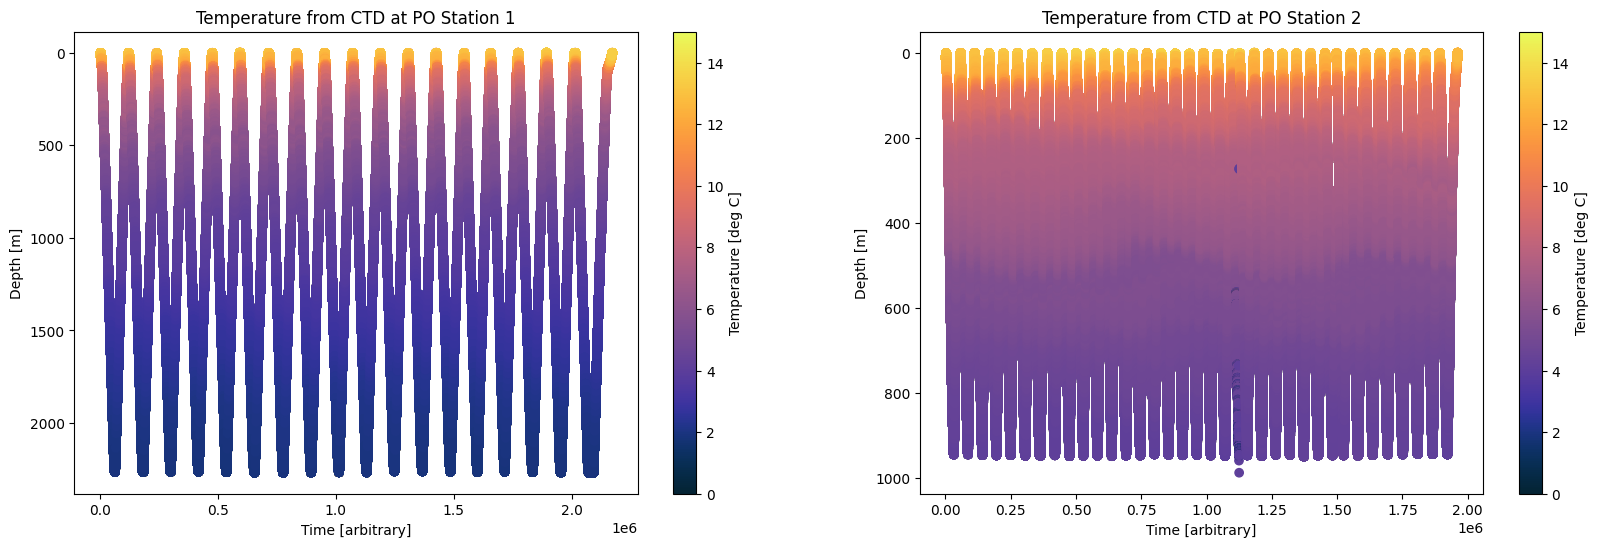

In [47]:

fig, axes = plt.subplots(1,2,figsize=(20,6))
#x = np.arange(0,num_casts)
#z = z_coord

ax = axes[0]
station_number = 1
tempanom = temp1_all1 - np.nanmean(temp1_all1)
arbitrary_time = np.arange(0,len(p_all1))
scat = ax.scatter(arbitrary_time,p_all1,c=temp1_all1,cmap=cmocean.cm.thermal,vmin=0,vmax=15) #vmin,vmax
ax.set_title(f'Temperature from CTD at PO Station {station_number}')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time [arbitrary]')
ax.invert_yaxis()
cbar = plt.colorbar(scat,orientation='vertical',label='Temperature [deg C]')

ax = axes[1]
station_number = 2
tempanom = temp1_all1 - np.nanmean(temp1_all1)
arbitrary_time = np.arange(0,len(p_all2))
scat = ax.scatter(arbitrary_time,p_all2,c=temp1_all2,cmap=cmocean.cm.thermal,vmin=0,vmax=15) #vmin,vmax
ax.set_title(f'Temperature from CTD at PO Station {station_number}')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time [arbitrary]')
ax.invert_yaxis()
cbar = plt.colorbar(scat,orientation='vertical',label='Temperature [deg C]')

plt.show()


In [48]:
fig.savefig('/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/figures/cruise_report_figures/po_stations_temp.png',dpi=300,bbox_inches='tight')


In [38]:
print(f'min temp: {np.nanmin(temp1_all1)}')
print(f'max temp: {np.nanmax(temp1_all1)}')

temp1_all2[temp1_all2 < 0] = np.nan 
temp1_all2[temp1_all2 > 20] = np.nan 
print(f'min temp: {np.nanmin(temp1_all2)}')
print(f'max temp: {np.nanmax(temp1_all2)}')

min temp: 1.8046
max temp: 13.4549
min temp: 0.0004
max temp: 18.0687


np.int64(464)

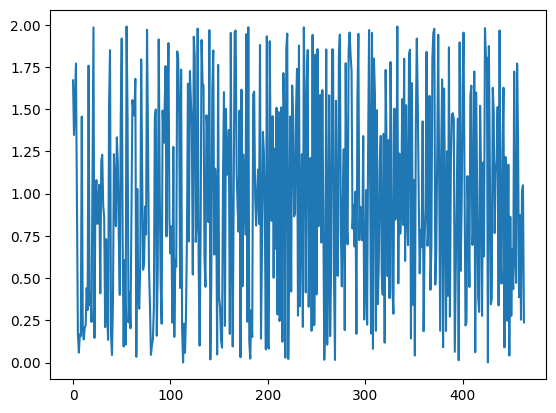

In [45]:
plt.plot(temp1_all2[temp1_all2<2])
sum(temp1_all2<2)

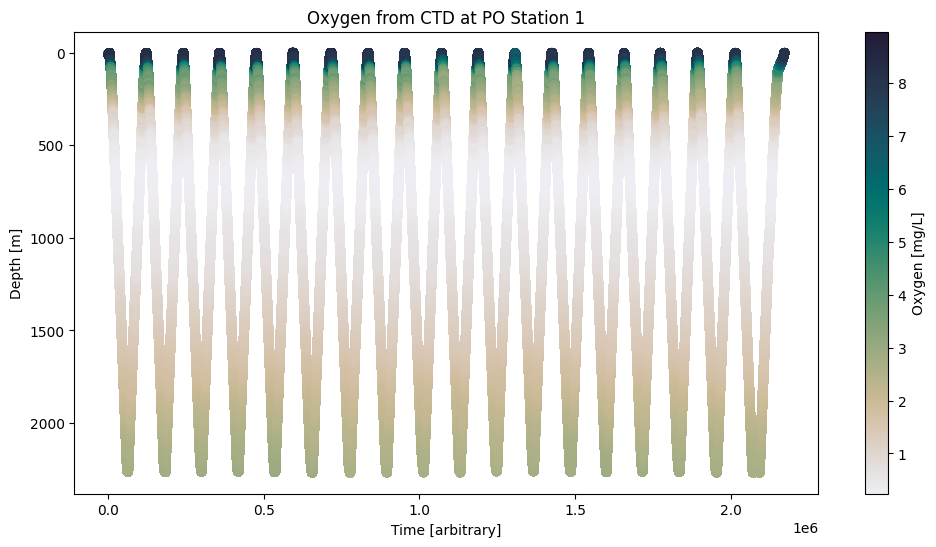

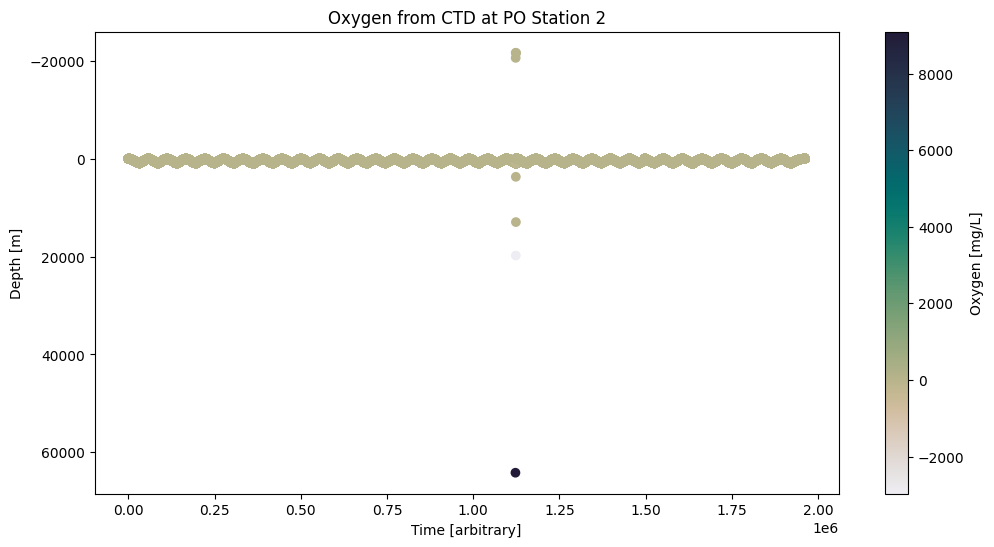

In [23]:
plt.figure(figsize=(12,6))
arbitrary_time = np.arange(0,len(p_all1))
#x = np.arange(0,num_casts)
#z = z_coord
station_number = 1
scat = plt.scatter(arbitrary_time,p_all1,c=oxy_all1,cmap=cmocean.cm.rain) #ice_r) #vmin,vmax
plt.title(f'Oxygen from CTD at PO Station {station_number}')
plt.ylabel('Depth [m]')
plt.xlabel('Time [arbitrary]')
plt.gca().invert_yaxis()
cbar = plt.colorbar(scat,orientation='vertical',label='Oxygen [mg/L]')
plt.show()

plt.figure(figsize=(12,6))
arbitrary_time = np.arange(0,len(p_all2))
#x = np.arange(0,num_casts)
#z = z_coord
station_number = 2
scat = plt.scatter(arbitrary_time,p_all2,c=oxy_all2,cmap=cmocean.cm.rain) #ice_r) #vmin,vmax
plt.title(f'Oxygen from CTD at PO Station {station_number}')
plt.ylabel('Depth [m]')
plt.xlabel('Time [arbitrary]')
plt.gca().invert_yaxis()
cbar = plt.colorbar(scat,orientation='vertical',label='Oxygen [mg/L]')
plt.show()


In [ ]:
sum(p_all2>1000)

In [ ]:
sum(p_all2<-10)


In [29]:
# will need to do some QAQC! 

idx_bad = p_all2>1000
p_all2[idx_bad] = np.nan
temp1_all2[idx_bad] = np.nan
sal1_all2[idx_bad] = np.nan
oxy_all2[idx_bad] = np.nan
chl_all2[idx_bad] = np.nan

idx_bad = p_all2<-10
p_all2[idx_bad] = np.nan
temp1_all2[idx_bad] = np.nan
sal1_all2[idx_bad] = np.nan
oxy_all2[idx_bad] = np.nan
chl_all2[idx_bad] = np.nan


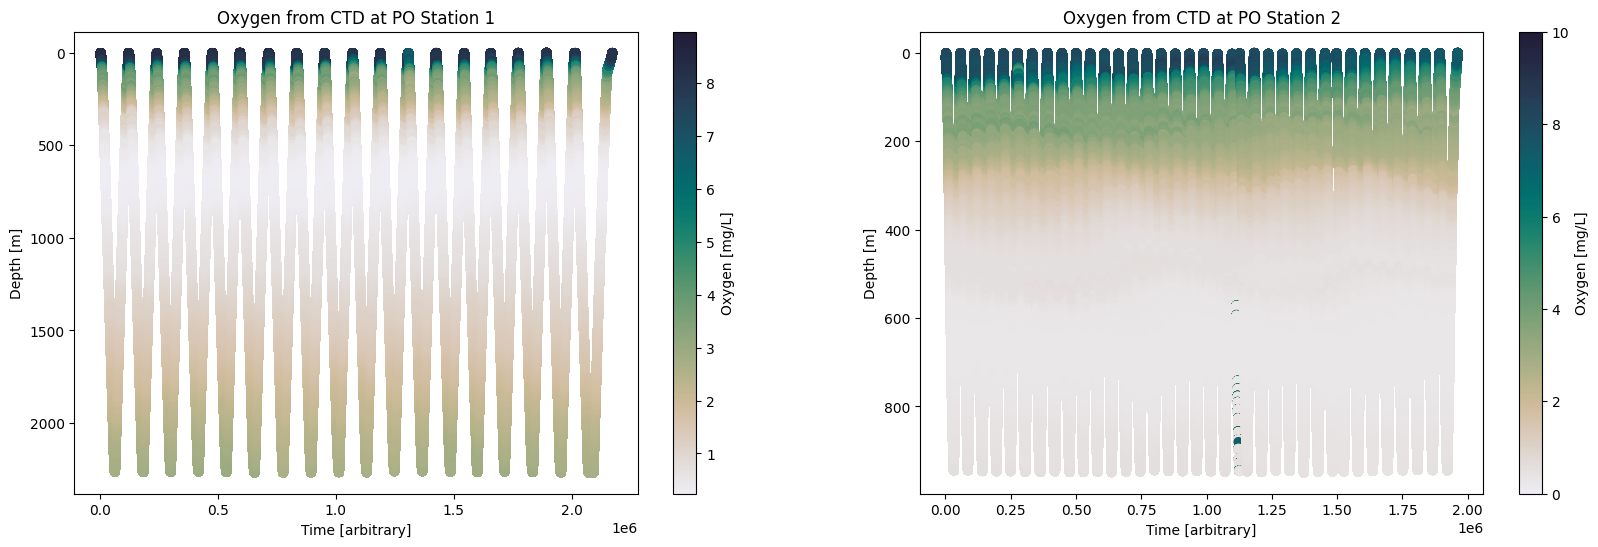

In [53]:
fig, axes = plt.subplots(1,2,figsize=(20,6))

ax = axes[0]

arbitrary_time = np.arange(0,len(p_all1))
#x = np.arange(0,num_casts)
#z = z_coord
station_number = 1
scat = ax.scatter(arbitrary_time,p_all1,c=oxy_all1,cmap=cmocean.cm.rain, vmin=0,vmax=10) #ice_r) #vmin,vmax
ax.set_title(f'Oxygen from CTD at PO Station {station_number}')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time [arbitrary]')
ax.invert_yaxis()
cbar = plt.colorbar(scat,orientation='vertical',label='Oxygen [mg/L]')

ax = axes[1] 

arbitrary_time = np.arange(0,len(p_all2))
#x = np.arange(0,num_casts)
#z = z_coord
station_number = 2
scat = ax.scatter(arbitrary_time,p_all2,c=oxy_all2,cmap=cmocean.cm.rain, vmin=0,vmax=10)
ax.set_title(f'Oxygen from CTD at PO Station {station_number}')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time [arbitrary]')
ax.invert_yaxis()
cbar = plt.colorbar(scat,orientation='vertical',label='Oxygen [mg/L]')
plt.show()


In [54]:
fig.savefig('/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/figures/cruise_report_figures/po_stations_dissolvedoxygen.png',dpi=300,bbox_inches='tight')


In [50]:
print(f'min o2: {np.nanmin(oxy_all1)}')
print(f'max o2: {np.nanmax(oxy_all1)}')

oxy_all2[oxy_all2 < 0] = np.nan 
oxy_all2[oxy_all2 > 20] = np.nan 
print(f'min o2: {np.nanmin(oxy_all2)}')
print(f'max o2: {np.nanmax(oxy_all2)}')

min o2: 0.239
max o2: 8.9766
min o2: 0.0908
max o2: 17.8072


In [ ]:
plt.figure(figsize=(12,6))
arbitrary_time = np.arange(0,len(p_all1))
#x = np.arange(0,num_casts)
#z = z_coord
station_number = 1
scat = plt.scatter(arbitrary_time,p_all1,c=temp1_all1,cmap=cmocean.cm.thermal) #ice_r) #vmin,vmax
plt.title(f'Temperature from CTD at PO Station {station_number}')
plt.ylabel('Depth [m]')
plt.xlabel('Time [arbitrary]')
plt.gca().invert_yaxis()
cbar = plt.colorbar(scat,orientation='vertical',label='Temperature [deg C]')
plt.show()

plt.figure(figsize=(12,6))
arbitrary_time = np.arange(0,len(p_all2))
#x = np.arange(0,num_casts)
#z = z_coord
station_number = 2
scat = plt.scatter(arbitrary_time,p_all2,c=temp1_all2,cmap=cmocean.cm.thermal, vmin=1.5,vmax=14)
plt.title(f'Temperature from CTD at PO Station {station_number}')
plt.ylabel('Depth [m]')
plt.xlabel('Time [arbitrary]')
plt.gca().invert_yaxis()
cbar = plt.colorbar(scat,orientation='vertical',label='Temperature [deg C]')
plt.show()

In [ ]:
plt.figure()
arbitrary_time = np.arange(0,len(p_all1))
#x = np.arange(0,num_casts)
#z = z_coord
log_chl = np.log(chl_all1)
p = plt.scatter(arbitrary_time,p_all1,c=log_chl,cmap=cmocean.cm.haline) #vmin,vmax
plt.title(f'Fluorescence from CTD at PO Station {station_number}')
plt.ylabel('Depth [m]')
plt.xlabel('Time [arbitrary]')
plt.gca().invert_yaxis()
cbar = plt.colorbar(p,orientation='vertical')

'''
    # define the max and min yourself 
        p = ax.scatter(dctd,z,c=var,cmap=cmaps[i],vmin=ranges[i][0],vmax=ranges[i][1])
        
        # or use max min or data 
        nmin = np.nanmin(var); nmax = np.nanmax(var)
        # p = ax.scatter(dctd,z,c=var,cmap=cmaps[i],vmin=nmin,vmax=nmax)
        
        ax.set_title(var_names[i],fontweight='bold')
        xx = [dctd[0],dctd[-1]]; yy = [np.nanmin(z),np.nanmax(z)]
        ax.set_xlim(xx); ax.set_ylim(yy)
        ax.invert_yaxis()

        if i == 3:
            ax.set_xlabel('Time')
            ax.tick_params(axis='x',which='both',bottom=True,top=False,labelbottom=True)
        
        else: 
            ax.tick_params(axis='x',which='both',bottom=True,top=False,labelbottom=False)

            
        cax = fig.add_axes([0.875,bottom[i],0.02,height[i]]) # [left, bottom, width, height]
        cbar = plt.colorbar(p,cax=cax,orientation='vertical',format='%f')
        cbar.set_label(unit_names[i],labelpad=5,fontsize=10)
        cax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
        cax.xaxis.set_ticks_position('top')

    ax.xaxis.set_major_formatter(DateFormatter('%H:%M\n%m-%d'))
    ax.xaxis.set_major_locator(mdates.HourLocator(byhour=12))
'''


plt.show()

In [ ]:
plt.figure()
arbitrary_time = np.arange(0,len(p_all))
#x = np.arange(0,num_casts)
#z = z_coord
log_chl = np.log(chl_all)
p = plt.scatter(arbitrary_time,p_all,c=log_chl,cmap=cmocean.cm.haline,vmin=-3,vmax=2) #vmin,vmax
plt.title(f'Fluorescence from CTD at PO Station {station_number}')
plt.ylabel('Depth [m]')
plt.gca().set_ylim([100,0])
plt.xlabel('Time [arbitrary]')
cbar = plt.colorbar(p,orientation='vertical',label='Log Fluorescence [arbitrary]')
plt.show()

In [ ]:
plt.figure()
arbitrary_time = np.arange(0,len(p_all))
#x = np.arange(0,num_casts)
#z = z_coord
log_chl = np.log(chl_all)
p = plt.scatter(arbitrary_time,p_all,c=log_chl,cmap=cmocean.cm.haline) #vmin,vmax
plt.title(f'Temperature at Station {station_number}')
plt.ylabel('Depth [m]')
plt.xlabel('Time [arbitrary]')
plt.gca().invert_yaxis()
cbar = plt.colorbar(p,orientation='vertical')
plt.show()

In [ ]:
metadata

In [ ]:
temp1 = data['Column_0']
cond1 = data['Column_1']
p = data['Column_2']
temp2 = data['Column_3']
cond2 = data['Column_4']
beam_trans = data['Column_5']
fluoro = data['Column_6']
alt = data['Column_7']
PAR = data['Column_8']
oxy = data['Column_9']
na = data['Column_10']
upv = data['Column_11']
na2 = data['Column_12']
SPAR = data['Column_13']
sal1 = data['Column_14']
sal2 = data['Column_15']


In [ ]:

# plot to show
fig,ax0 = plt.subplots(figsize=(12,6))

ax0 = plt.subplot(1,6,1)
color = 'tab:red'
ax0.plot(temp1,p,color=color)
ax0.invert_yaxis()
ax0.set_ylabel('Depth [dbar]'); 
ax0.set_ylabel('Temperature [deg C]',color=color)
ax0.tick_params(axis='x', labelcolor=color)
ax0.grid(color=color,alpha=0.5)

#ax1 = ax0.twiny()
ax1 = plt.subplot(1,6,2)
color = 'purple'
ax1.plot(sal1,p,color=color)
ax1.invert_yaxis()
ax1.set_ylabel('Salinity [psu]',color=color,labelpad=4)
ax1.tick_params(axis='x', labelcolor=color, pad=10)
ax1.grid(color=color,alpha=0.5)

#ax2 = ax0.twiny()
ax2 = plt.subplot(1,6,3)
color = 'cyan'
ax2.plot(oxy,p,label='O2',color=color)
ax2.invert_yaxis()
ax2.set_ylabel('Dissolved Oxygen [mg/L]',color=color,labelpad=1)
ax2.tick_params(axis='x', labelcolor=color, pad=10)
ax2.grid(color=color,alpha=0.5)

#ax3 = ax2.twiny()
ax3 = plt.subplot(1,6,4)
color = 'green'
ax3.plot(fluoro,p,label='Fluoro',color=color)
ax3.invert_yaxis()
ax3.set_ylabel('Fluorescence',color=color,labelpad=1)
ax3.tick_params(axis='x', labelcolor=color, pad=10)
ax3.grid(color=color,alpha=0.5)


#ax4 = ax2.twiny()
ax4 = plt.subplot(1,6,5)
color = 'orange'
ax4.plot(PAR,p,color=color)
ax4.invert_yaxis()
ax4.set_ylabel('PAR [umol photons /m2 /s]',color=color,labelpad=1)
ax4.tick_params(axis='x', labelcolor=color, pad=10)
ax4.grid(color=color,alpha=0.5)


#ax5 = ax2.twiny()
ax5 = plt.subplot(1,6,6)
color = 'brown'
ax5.plot(upv,p,label='UPV',color=color)
ax5.invert_yaxis()
ax5.set_ylabel('UPV Scattering',color=color,labelpad=1)
ax5.tick_params(axis='x', labelcolor=color, pad=10)
ax5.grid(color=color,alpha=0.5)


#ax5 = ax2.twiny()
ax5 = plt.subplot(1,6,6)
color = 'brown'
ax5.plot(beam_trans,p,label='trans',color=color)
ax5.invert_yaxis()
ax5.set_ylabel('Transmissiometer',color=color,labelpad=1)
ax5.tick_params(axis='x', labelcolor=color, pad=10)
ax5.grid(color=color,alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
fig, ax = plt.subplots() 
ax0 = plt.plot(cond1,p,label='Cond')
ax0.invert_yaxis()
ax1 = ax0.twinx()
ax1.plot(upv,p,label='UPV')
ax1.invert_yaxis()
ax2 = ax1.twinx()
ax2.plot(temp1,p,label='Temp')
ax2.invert_yaxis()
ax3 = ax2.twinx()
ax2.plot(temp1,p,label='Temp')
ax2.invert_yaxis()
ax3 = ax2.twinx()
plt.plot(fluoro,p,label='Fluoro')
ax2.invert_yaxis()
ax3 = ax2.twinx()
ax2.plot(temp1,p,label='Temp')
ax2.invert_yaxis()
ax3 = ax2.twinx()


plt.plot(temp1,p,label='Temp')
plt.plot(oxy,p,label='O2')
plt.plot(PAR,p,label='PAR')
plt.gca().invert_yaxis()
plt.legend()

In [ ]:

temp1 = data['Column_0'].values
cond1 = data['Column_1'].values
p = data['Column_2'].values
temp2 = data['Column_3'].values
cond2 = data['Column_4'].values
trans = data['Column_5'].values
fluoro = data['Column_6'].values
altimeter = data['Column_7'].values
PAR = data['Column_8'].values
oxygen = data['Column_9'].values
upv = data['Column_10'].values
SPAR = data['Column_11'].values
sal1 = data['Column_12'].values
sal2 = data['Column_13'].values
lon = data['Column_14'].values
lat = data['Column_15'].values
flag = data['Column_16'].values

# plot to show
fig = plt.figure(figsize=(12,6))
#,ax = plt.subplots(figsize=(12,6))

ax0 = plt.subplot(1,6,1)
color = 'tab:red'
ax0.plot(temp1,p,color=color)
ax0.invert_yaxis()
ax0.set_ylabel('Depth [dbar]'); 
ax0.set_ylabel('Temperature [deg C]',color=color)
#ax0.tick_params(axis='x', labelcolor=color)
ax0.grid(color=color,alpha=0.5)

#ax1 = ax0.twiny()
ax1 = plt.subplot(1,6,2)
color = 'purple'
ax1.plot(sal1,p,color=color)
ax1.invert_yaxis()
ax1.set_ylabel('Salinity [psu]',color=color,labelpad=4)
ax1.tick_params(axis='x', labelcolor=color, pad=10)
ax1.grid(color=color,alpha=0.5)

#ax2 = ax0.twiny()
ax2 = plt.subplot(1,6,3)
color = 'cyan'
ax2.plot(oxygen,p,label='O2',color=color)
ax2.invert_yaxis()
ax2.set_ylabel('Dissolved Oxygen [mg/L]',color=color,labelpad=1)
ax2.tick_params(axis='x', labelcolor=color, pad=10)
ax2.grid(color=color,alpha=0.5)

#ax3 = ax2.twiny()
ax3 = plt.subplot(1,6,4)
color = 'green'
ax3.plot(fluoro,p,label='Fluoro',color=color)
ax3.invert_yaxis()
ax3.set_ylabel('Fluorescence',color=color,labelpad=1)
ax3.tick_params(axis='x', labelcolor=color, pad=10)
ax3.grid(color=color,alpha=0.5)


#ax4 = ax2.twiny()
ax4 = plt.subplot(1,6,5)
color = 'orange'
ax4.plot(PAR,p,color=color)
ax4.invert_yaxis()
ax4.set_ylabel('PAR [umol photons /m2 /s]',color=color,labelpad=1)
ax4.tick_params(axis='x', labelcolor=color, pad=10)
ax4.grid(color=color,alpha=0.5)


#ax5 = ax2.twiny()
ax5 = plt.subplot(1,6,6)
color = 'brown'
ax5.plot(upv,p,label='UPV',color=color)
ax5.invert_yaxis()
ax5.set_ylabel('UPV Scattering',color=color,labelpad=1)
ax5.tick_params(axis='x', labelcolor=color, pad=10)
ax5.grid(color=color,alpha=0.5)


#ax5 = ax2.twiny()
ax6 = plt.subplot(1,6,6)
color = 'brown'
ax6.plot(trans,p,label='trans',color=color)
plt.gca().invert_yaxis()
ax6.invert_yaxis()
ax6.set_xlim([90,100])
ax6.set_ylabel('Transmissiometer',color=color,labelpad=1)
ax6.tick_params(axis='x', labelcolor=color, pad=10)
ax6.grid(color=color,alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
# process SR2503 files

base = '/home/vboatwright/mnt/scienceparty_share/SR2503_scienceparty_share/CTD/'
stn = 8 

for ii in np.arange(0,stn): 
    icast = ii+1 
    
    

metadata, data = parse_cnv_file(folder+filename)

# Example: Print metadata
print("Metadata:")
for key, value in metadata.items():
    print(f"{key}: {value}")

# Example: Show the first 5 rows of data
print("\nData:")
print(data.head())


temp1 = data['Column_0'].values
cond1 = data['Column_1'].values
density1 = data['Column_2'].values
depth1 = data['Column_3'].values
fluor1 = data['Column_4'].values
lat1 = data['Column_5'].values
lon1 = data['Column_6'].values
nitrogen1 = data['Column_7'].values
oxygen1 = data['Column_8'].values
salinity1 = data['Column_9'].values
flag1 = data['Column_10'].values

